In [1]:
import librosa
from librosa import display
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cmath
import seaborn as sns
import scipy
import IPython.display as ipd
import math
from numpy.linalg import inv
import torch 
import torchvision
from torchvision import datasets
import numpy as np
import time
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Performing STFT and uploading the audio files

In [2]:
train_clean_male, sr1 = librosa.load("train_clean_male.wav",sr=None)
S=librosa.stft(train_clean_male,n_fft=1024,hop_length=512)
ipd.display(ipd.Audio(train_clean_male,rate=16000))

In [3]:
sn,sr2=librosa.load("train_dirty_male.wav",sr=None)
X=librosa.stft(sn,n_fft=1024,hop_length=512)
ipd.display(ipd.Audio(sn,rate=16000))

### Taking Absolute Values of X

In [4]:
mod_S=np.abs(S)
mod_X=np.abs(X)

print(np.shape(mod_S))

(513, 2459)


### Defining Network with three hidden layers and batch Size

In [5]:
input_size1 = 513
hidden_size1 = [1024,1024,1024]
num_classes1 = 513
num_epochs = 500
batch_size1 = 128

#### Class for Neural Network

In [6]:
class ThreeLayer_NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes,initialization,activation,dropout):
        super(ThreeLayer_NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0]) 
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc1.weight)
          torch.nn.init.zeros_(self.fc1.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc1.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc1.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc1.weight)
          torch.nn.init.zeros_(self.fc1.bias)

        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1]) 
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc2.weight)
          torch.nn.init.zeros_(self.fc2.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc2.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc2.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc2.weight)
          torch.nn.init.zeros_(self.fc2.bias)

        self.fc3 = nn.Linear(hidden_size[1], hidden_size[2]) 
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc3.weight)
          torch.nn.init.zeros_(self.fc3.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc3.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc3.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc3.weight)
          torch.nn.init.zeros_(self.fc3.bias) 

        self.fc4 = nn.Linear(hidden_size[2], num_classes)
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc4.weight)
          torch.nn.init.zeros_(self.fc4.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc4.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc4.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc4.weight)
          torch.nn.init.zeros_(self.fc4.bias)  

        if activation=="relu":
          self.act= nn.ReLU()
        if activation=="sigmoid":
          self.act=nn.Sigmoid()
        if activation=="tanh":
          self.act=nn.Tanh()

        if dropout== "Yes":
          self.firstlayer_dropout=torch.nn.Dropout(p=0.4)
          self.hiddenlayer_dropout=torch.nn.Dropout(p=0.4)
        
        if dropout== "No":
          self.firstlayer_dropout=torch.nn.Dropout(p=0)
          self.hiddenlayer_dropout=torch.nn.Dropout(p=0)
        
        self.act1=nn.ReLU()

    
    def forward(self, x):
        x=torch.transpose(x, 0, 1).to(device)
        out1 = self.fc1(x)
        out2 = self.hiddenlayer_dropout(self.act(out1))
        out3 = self.fc2(out2)
        out4 = self.hiddenlayer_dropout(self.act(out3))
        out5 = self.fc3(out4)
        out6 = self.hiddenlayer_dropout(self.act(out5))
        out7 = self.fc4(out6)
        out8 = self.act1(out7)
        return out8


In [7]:
model1 = ThreeLayer_NeuralNet(input_size1, hidden_size1,num_classes1,"Kaiming","relu","No").cuda()

# Loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(),lr=0.0003) 

In [8]:
errt=[0 for i in range(200)]
for epoch in range(200):
    running_loss=0
    for j in range(19):
        # Move tensors to the configured device
        if (j+1)*128 <= 2459:
          images= torch.tensor(mod_X[:,j*128:(j+1)*128],device=device)
          labels=torch.tensor(mod_S[:,j*128:(j+1)*128],device=device)
        else:
          images=torch.tensor(mod_X[:,j*128:2459],device=device)
          labels = torch.tensor(mod_S[:,j*128:2459],device=device)
        
        # Forward pass
        outputs = model1(images).cuda()
        loss = criterion(outputs.cuda(), torch.transpose(labels,0,1))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    
    errt[epoch]=running_loss/19
    print("Epoch:", epoch,"Loss:",running_loss/19)

Epoch: 0 Loss: 0.07171502728995524
Epoch: 1 Loss: 0.0334648538969065
Epoch: 2 Loss: 0.02266844165952582
Epoch: 3 Loss: 0.018043886576043933
Epoch: 4 Loss: 0.015471538798393388
Epoch: 5 Loss: 0.014019278956479147
Epoch: 6 Loss: 0.013102388058445956
Epoch: 7 Loss: 0.01257520110199326
Epoch: 8 Loss: 0.011817853775267539
Epoch: 9 Loss: 0.01133059688206566
Epoch: 10 Loss: 0.01081573066154593
Epoch: 11 Loss: 0.010460123125659792
Epoch: 12 Loss: 0.010057754152895589
Epoch: 13 Loss: 0.0097488936428961
Epoch: 14 Loss: 0.009357415507302472
Epoch: 15 Loss: 0.00902899781143979
Epoch: 16 Loss: 0.008718149246353852
Epoch: 17 Loss: 0.008523733882037433
Epoch: 18 Loss: 0.008633141307846495
Epoch: 19 Loss: 0.008516664114339571
Epoch: 20 Loss: 0.008272554872459486
Epoch: 21 Loss: 0.008095532741495654
Epoch: 22 Loss: 0.007762569443959939
Epoch: 23 Loss: 0.007436632583113878
Epoch: 24 Loss: 0.00716590908306994
Epoch: 25 Loss: 0.006884807120322397
Epoch: 26 Loss: 0.006768954059991397
Epoch: 27 Loss: 0.0066

Text(0.5, 1.0, 'Convergence')

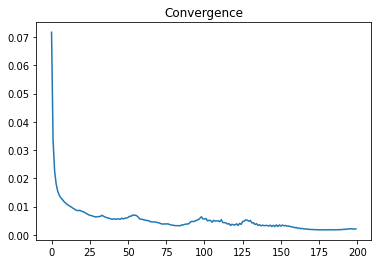

In [9]:
plt.figure()
plt.plot(errt)
plt.title('Convergence')

#### Uploading test_01_x.wav 

In [10]:
test_x_01,sr2=librosa.load("test_x_01.wav",sr=None)
ipd.display(ipd.Audio(test_x_01,rate=16000))

### Performing STFT on test_01_x.wav and taking absolute value

In [11]:
testx01=librosa.stft(test_x_01,n_fft=1024,hop_length=512)
testx01_abs=np.abs(testx01)
print(np.shape(testx01_abs))

(513, 142)


In [12]:
new_outputs=model1(torch.tensor(testx01_abs)) 
new_outputs1=torch.transpose(new_outputs,0,1)
new_output2=torch.div(torch.mul(torch.tensor(testx01,device=device),new_outputs1),torch.abs(torch.tensor(testx01,device=device)))

### Recovered Version of test_01_x.wav

In [13]:
recovered_test_01_x=(new_output2.data).cpu().numpy()
ipd.display(ipd.Audio(librosa.core.istft(recovered_test_01_x, hop_length=512),rate=16000))

#### Uploading test_02_x.wav 

In [14]:
test_x_02,sr2=librosa.load("test_x_02.wav",sr=None)


### Performing STFT on test_02_x.wav and taking absolute value

In [15]:
testx02=librosa.stft(test_x_02,n_fft=1024,hop_length=512)
testx02_abs=np.abs(testx02)

In [16]:
new_outputs=model1(torch.tensor(testx02_abs))
new_outputs1=torch.transpose(new_outputs,0,1)
new_output2=torch.div(torch.mul(torch.tensor(testx02,device=device),new_outputs1),torch.abs(torch.tensor(testx02,device=device)))

### Recovered Version of test_02_x.wav

In [17]:
recovered_test_02_x=(new_output2.data).cpu().numpy()
ipd.display(ipd.Audio(librosa.core.istft(recovered_test_02_x, hop_length=512),rate=sr2))

Note: The architecture used for the Network has 3 hidden layers with Relu Activation being used with a learning rate of 0.00003 for 200 epochs